Machine Learning Homework 6<br>
K-means clustering on Iris data<br>
- Create KMeans clustering Juypter Notebook of a public dataset.<br>
- Create a faceted plot KMeans cluster of a public dataset, where each facet is a cluster:  can use ggplot, seaborn or plotly.<br>
- Demonstrate use of elbow method (as described in reading and lecture) in notebook.<br>
- Demonstrate use of silhouette plot (as described in reading and lecture) in notebook.<br>

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [86]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
# Create KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df)
iris_df['cluster'] = kmeans.labels_
print(kmeans.cluster_centers_);iris_df.tail()

[[  5.00600000e+00   3.41800000e+00   1.46400000e+00   2.44000000e-01
    1.00000000e+00]
 [  5.90161290e+00   2.74838710e+00   4.39354839e+00   1.43387097e+00
   -1.22124533e-15]
 [  6.85000000e+00   3.07368421e+00   5.74210526e+00   2.07105263e+00
    2.00000000e+00]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,1


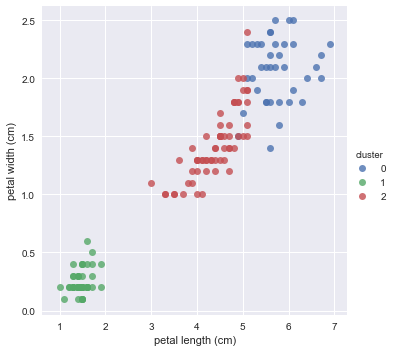

In [88]:
import seaborn as sns
sns.lmplot(data=iris_df, x="petal length (cm)", y="petal width (cm)", fit_reg=False, hue="cluster")
plt.show()

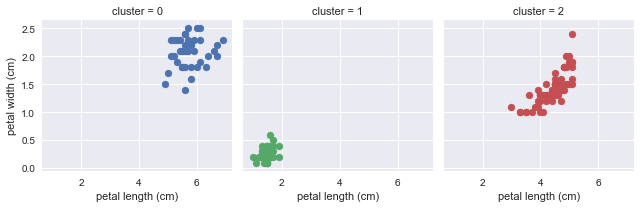

In [89]:
# Create a faceted plot KMeans cluster
facet_plot = sns.FacetGrid(iris_df, col="cluster", hue="cluster")
facet_plot.map(plt.scatter, "petal length (cm)", "petal width (cm)")
plt.show()

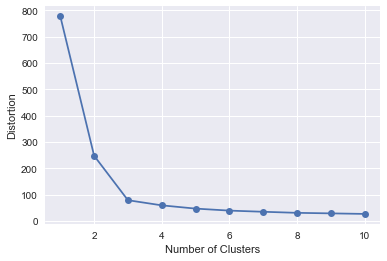

In [90]:
# Elbow method
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=30,
        max_iter=3000,
        tol=1e-04,
        random_state=10)
    km.fit(iris_df)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


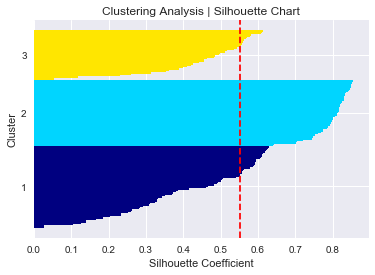

In [102]:
# Silhouette plot

from matplotlib import cm
from sklearn.metrics import silhouette_samples

X = iris_df.drop('cluster', axis=1)
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

# Plot modifications and labels
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Clustering Analysis | Silhouette Chart')
plt.show()


